### '한국 복지 패널 데이터'를 이용한 데이터 분석
- 직업별 월급 분포 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': "8, 6"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

pd.set_option('display.max_rows', 100)     # 행은 최대 100까지 출력
pd.set_option('display.max_columns', None) # 열은 무제한 출력

raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav');
print(type(raw))

# 1~17차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h17_g3'     : 'gender',         #  성별, 1: 남, 2: 여
         'h17_g4'     : 'birth',          #  태어난 연도
         'h17_g10'    : 'marriage_type',  #  혼인 상태
         'h17_g11'    : 'religion',       #  종교 
         'p1702_8aq1' : 'income',         #  일한달의 월 평균 임금 
         'h17_eco9'   : 'code_job',       #  직업 코드
         'h17_reg7'   : 'code_region'})   #  7개 권역별 지역구분

<class 'pandas.core.frame.DataFrame'>


In [2]:
raw[['code_job']].head(5)

,code_job
0,NaN
1,942.0
2,762.0
3,855.0
4,399.0


In [3]:
# 직종 코드 확인
list_job=pd.read_excel('./Koweps_Codebook_2022.xlsx', sheet_name='직종코드')
print(type(list_job))
print(list_job.head(5))

<class 'pandas.core.frame.DataFrame'>
   code_job                     job
0       111  의회 의원∙고위 공무원 및 공공단체 임원
1       112                기업 고위 임원
2       121          행정 및 경영 지원 관리자
3       122         마케팅 및 광고∙홍보 관리자
4       131       연구∙교육 및 법률 관련 관리자


In [4]:
# 직종의 merge
raw=raw.merge(list_job, how='left', on='code_job')
raw[['code_job', 'job']].head(5)

,code_job,job
0,NaN,NaN
1,942.0,건물 관리원 및 검표원
2,762.0,전기공
3,855.0,금속기계 부품 조립원
4,399.0,고객 상담 및 기타 사무원


In [10]:
# 성별 변경
raw['gender'] = np.where(raw['gender'] == 1, 'male', 'female')
raw['gender'].head(3)

0    female
1      male
2      male
Name: gender, dtype: object

In [5]:
df = raw.copy()
df.head(3)

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,p17_wgl,p17_wsc_all,p17_wsl_all,p17_wgc_all,p17_wgl_all,p17_wsc_n_all,p17_wsl_n_all,p17_wgc_n_all,p17_wgl_n_all,h17_reg5,code_region,h17_din,h17_cin,h17_flag,h17_hc,h17_hc_all,h17_hc_n_all,nh1701_1,nh1701_2,h1701_1,h17_pind,h17_pid,h17_g1,h17_g2,gender,birth,h17_g6,h17_g7,h17_g8,h17_g9,marriage_type,religion,h17_g12,h1701_110,h1701_11aq2,h1701_11aq3,h1701_11aq5,h1701_11aq6,h1701_11aq8,h1701_11aq10,h17_med1,h17_med2,h17_med3,h17_med4,h17_med5,h17_med6,h17_med7,h17_med8,h17_g9_1,h17_med9,h17_med10,h17_eco1,h17_eco2,h17_eco3,h17_eco4,h17_eco4_1,h17_eco5_1,h17_eco6,h17_eco_7_1,h17_eco_7_2,h17_eco_7_3,h17_eco8,code_job,h17_eco10,h17_eco11,h17_soc1,h17_soc_2,h17_soc_3,h17_soc_4,h17_soc_5,h17_soc_6,h17_soc_7,h17_soc_8,h17_soc_9,h17_soc_10,h17_soc_11,h17_soc8,h17_soc9,h17_soc11,h17_soc10,h17_soc_12,h17_soc_13,h1705_1,h1705_3aq1,h1705_2,h1705_3,h1705_4,h1705_5,h1705_6,h1705_7,nh1705_8,nh1705_9,h1705_3aq2,h1706_aq1,h1706_14aq1,h1706_1,h1706_2,h1706_4,h1706_5,h1706_3,h1706_3_16aq1,h1706_6,h1706_8,h1706_9,h1706_aq2,h1706_aq3,h1706_10,h1706_11,h1706_12,h1706_13,h1706_14,h1706_15,h1706_21,h1706_22,h1706_23,h1706_24,h1706_25,h1706_27,h1706_30,h1706_33,h1706_36,h1706_39,h1706_14aq2,h1706_3aq1,h1707_3aq1,h1707_3aq2,h1707_5aq1,h1707_3aq3,h1707_sub1,h1707_3aq4,h1707_3aq5,h1707_6aq1,h1707_3aq6,h1707_5aq2,h1707_3aq7,h1707_3aq8,h1707_3aq9,h1707_3aq10,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq13,h1707_6aq4,h1707_6aq6,h1707_13aq1,h1707_3aq14,h1707_3aq15,h1707_3aq16,h1707_3aq17,h1707_4,h1707_6aq7,h1707_6aq8,h1707_6aq9,h1707_6aq10,h1707_6aq11,h1707_5,h1707_6aq12,h1707_6aq13,h1707_6aq14,h1707_9,h17_inc1,h17_inc2_1,h17_inc2_2,h17_inc3_1,h17_inc3_2,h17_inc4_1,h17_inc4_2,h17_inc5_1,h17_inc5_2,h17_inc6_1,h17_inc6_2,h17_inc7_1,h17_inc7_2,h1708_106,h1708_107,h1708_108,h1708_109,h1708_110,h1708_111,h17_inc2_3,h17_inc2,h17_inc3_6,h17_inc3,h17_inc4_7,h17_inc4,h17_inc4_8,h17_inc4_9,h1708_155,h1708_156,h1708_157,h1708_158,h1708_160,h1708_159,h1708_3aq3,h1708_161,h1708_162,h1708_163,h1708_164,h1708_166,h1708_165,h1708_3aq4,h1708_167,h1708_168,h1708_169,h1708_170,h17_inc7_3,h17_inc7,h1708_aq9,h1708_aq10,h1708_aq11,h1708_aq12,h1708_14aq1,h1708_14aq2,h1708_aq13,h1708_aq14,h1708_aq15,h1708_6aq1,h1708_aq16,h1708_10aq1,h1708_aq19,h1708_aq20,h1708_aq21,h1708_5aq3,h1708_14aq3,h1708_aq22,h1708_aq23,h1708_aq24,h1708_4aq116,h1708_4aq117,h1708_5aq1,h1708_11aq1,h1708_7aq4,h1708_7aq6,h1708_7aq8,h1708_aq25,h1708_15aq1,h1708_16aq1,h1708_aq26,h1708_aq27,h1708_aq28,h1708_aq29,h1708_3aq5,h1708_4aq118,h1708_aq30,h1708_6aq3,h1708_3aq6,h1708_3aq7,nh1708_3aq1,h1708_aq32,h1708_aq33,h1708_aq34,h1708_11aq2,h1708_11aq3,h1708_11aq4,h1708_11aq5,h1708_11aq7,h1708_11aq8,h1709_aq1,h1709_aq2,h1709_aq3,h1709_aq4,h1709_aq5,h1709_aq6,h1709_aq7,h1709_aq8,h1709_12aq1,h1709_12aq2,h1709_12aq3,h1709_12aq4,h1709_12aq5,h1709_12aq6,h1709_12aq7,h1709_12aq11,h1709_12aq21,h1709_12aq31,h1709_12aq41,h1709_12aq51,h1709_12aq61,h1709_12aq71,h1710_aq1,h1710_aq2,h1710_aq3,h1710_aq4,h1710_aq5,h1710_aq6,h1710_aq7,h1710_aq8,h1710_aq9,h1710_aq10,h1710_aq11,h1710_aq12,h1710_aq13,h1710_aq14,h1710_aq15,h1710_aq16,h1710_aq17,h1710_aq18,h1710_aq19,h1710_aq20,h1710_26,h1710_27,h1710_aq23,h1710_aq24,h1710_aq25,h1710_aq26,h1711_2,h1711_3,h1711_4,h1711_5,h1711_6,h1711_7,h1711_8,h1711_3aq1,h1711_3aq2,h1711_3aq3,h1711_3aq4,h1711_3aq5,h1711_3aq6,h1711_3aq7,h1712_2_11aq1,h1712_2_11aq2,h1712_2_11aq3,h1712_2_11aq4,h1712_2_11aq5,h1712_2_11aq6,h1712_2_11aq7,h1712_2_11aq8,h1712_2_11aq9,h1712_2_11aq10,h1712_2_11aq11,h1712_2_11aq12,h1712_2_11aq13,h1712_2_11aq14,h1712_2_11aq15,h1712_2_11aq16,h1712_2_12aq1,h1712_2_11aq17,h1712_2_12aq2,h1712_2_11aq18,h1712_2_12aq3,h1712_2_11aq19,h1712_2_12aq4,h1712_2_11aq20,h1712_2_12aq5,h1712_2_11aq21,h1712_2_12aq6,h1712_2_11aq23,h1712_2_12aq7,h1712_2_11aq24,h1712_2_12aq8,h1712_2_11aq25,h1712_2_12aq9,h1712_2_11aq26,h1712_2_12aq10,h1712_2_11aq27,h1712_2_12aq11,h1712_2_11aq28,h1712_2_12aq12,h1712_2_11aq30,h1712_2_12aq13,h1712_2_11aq

In [24]:
df[['code_job', 'income']].isnull().sum()

code_job     8188
income      10958
dtype: int64

In [25]:
df.dropna(subset=['code_job', 'income'], inplace=True)
df[['code_job', 'income']].isnull().sum()

code_job    0
income      0
dtype: int64

In [26]:
# 직업별 월급 차이
code_job_income = df.groupby(['code_job'], as_index=False).agg(income_mean = ('income', 'mean'))
code_job_income.head(3)

,code_job,income_mean
0,111.0,404.666667
1,112.0,484.285714
2,121.0,654.166667


In [28]:
# 직업명별 월급 차이
job_income = df.groupby(['job'], as_index=False).agg(income_mean=('income', 'mean'))
job_income.head(3)

,job,income_mean
0,가사 및 육아 도우미,89.567568
1,간호사,309.875000
2,감정∙기술영업및중개관련종사자,437.000000


In [29]:
# 급여가 높은 상위 40개 직종 출력
top40 = job_income.sort_values(['income_mean'], ascending=[False]).head(40).reset_index(drop=False)
top40.head(5)

,index,job,income_mean
0,60,법률 전문가,1000.000000
1,99,의료 진료 전문가,901.000000
2,132,컴퓨터 하드웨어 및 통신공학 전문가,813.555556
3,147,화학공학 기술자 및 시험원,740.250000
4,63,보험 및 금융 관리자,728.500000


In [37]:
top40 = job_income.sort_values(['income_mean'], ascending=[False]).head(60).reset_index(drop=True)
top40.head(60)

,job,income_mean
0,법률 전문가,1000.000000
1,의료 진료 전문가,901.000000
2,컴퓨터 하드웨어 및 통신공학 전문가,813.555556
3,화학공학 기술자 및 시험원,740.250000
4,보험 및 금융 관리자,728.500000
5,장교,683.000000
6,항공기∙선박 기관사 및 관제사,677.000000
7,인사 및 경영 전문가,674.000000
8,기타 군인,656.500000
9,행정 및 경영 지원 관리자,654.166667


In [38]:
# 급여 내림 차순 출력
top = job_income.sort_values(['income_mean'], ascending=[False]).reset_index(drop=False)
top

,index,job,income_mean
0,60,법률 전문가,1000.000000
1,99,의료 진료 전문가,901.000000
2,132,컴퓨터 하드웨어 및 통신공학 전문가,813.555556
3,147,화학공학 기술자 및 시험원,740.250000
4,63,보험 및 금융 관리자,728.500000
...,...,...,...
146,33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,95.228070
147,0,가사 및 육아 도우미,89.567568
148,34,기타 서비스 관련 단순 종사자,77.660584
149,129,청소원 및 환경미화원,73.914992


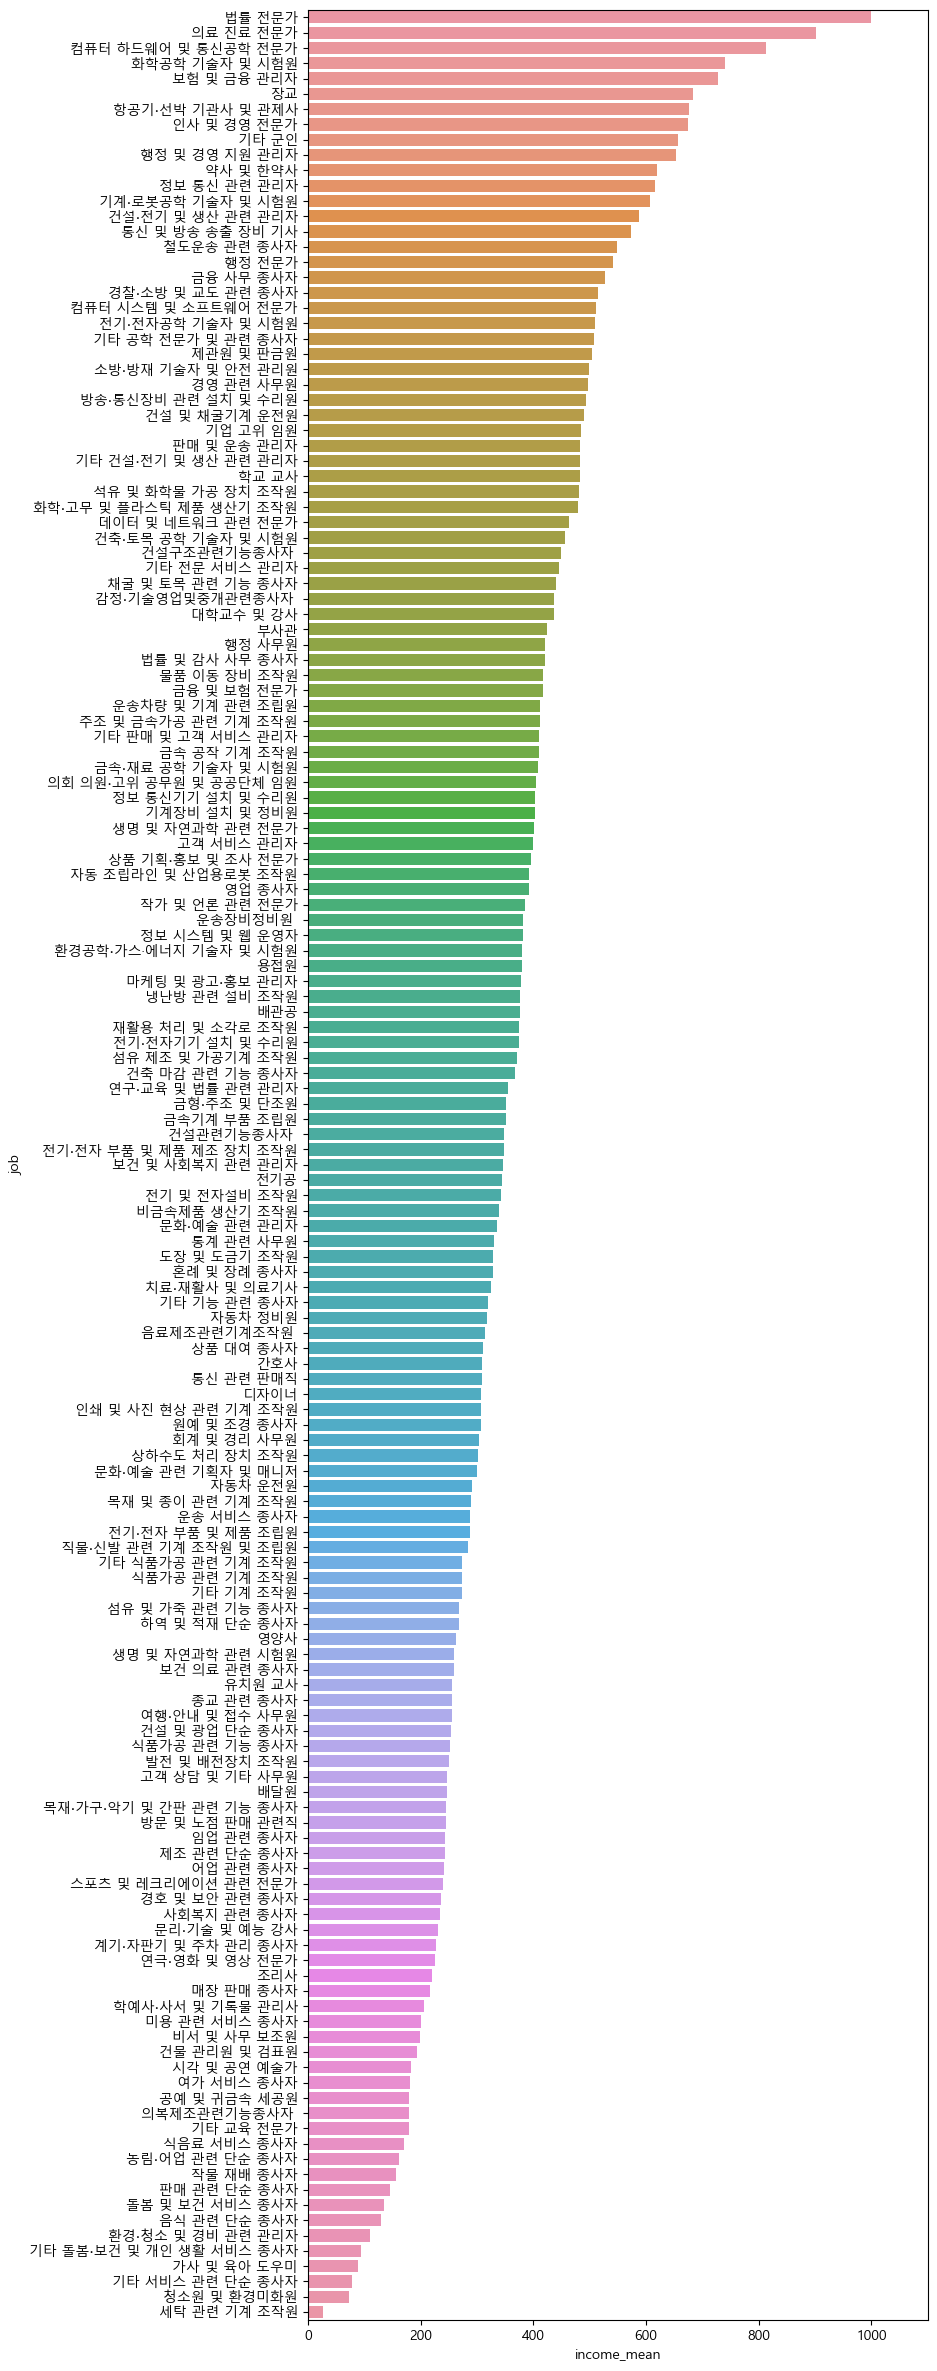

In [44]:
plt.rcParams.update({'figure.figsize': "8, 30"})
sns.barplot(data=top, y='job', x='income_mean').set(xlim=(0, 1100));

In [46]:
# 하위 40개 직종의 급여 출력
top.tail(40)

,index,job,income_mean
111,86,여행∙안내 및 접수 사무원,255.333333
112,4,건설 및 광업 단순 종사자,253.720000
113,82,식품가공 관련 기능 종사자,252.523810
114,54,발전 및 배전장치 조작원,250.000000
115,15,고객 상담 및 기타 사무원,247.776786
116,58,배달원,247.295775
117,48,목재∙가구∙악기 및 간판 관련 기능 종사자,245.375000
118,55,방문 및 노점 판매 관련직,245.000000
119,104,임업 관련 종사자,244.250000
120,122,제조 관련 단순 종사자,243.567308


### 성별 직업 빈도

In [11]:
df = raw.copy()

In [22]:
# 남성 직업 빈도 상위 30개 추출
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림 차순 정렬
# 상위 30개 추출
# index reset
job_male = df.dropna(subset=['job']).query('gender=="male"').groupby(['job']).agg(n=('job', 'count')) \
  .sort_values(['n'], ascending=[False]).head(30).reset_index(drop=False)
job_male

,job,n
0,작물 재배 종사자,651
1,자동차 운전원,235
2,경영 관련 사무원,210
3,청소원 및 환경미화원,184
4,매장 판매 종사자,153
5,기타 서비스 관련 단순 종사자,109
6,영업 종사자,107
7,건설 및 광업 단순 종사자,101
8,제조 관련 단순 종사자,96
9,행정 사무원,87


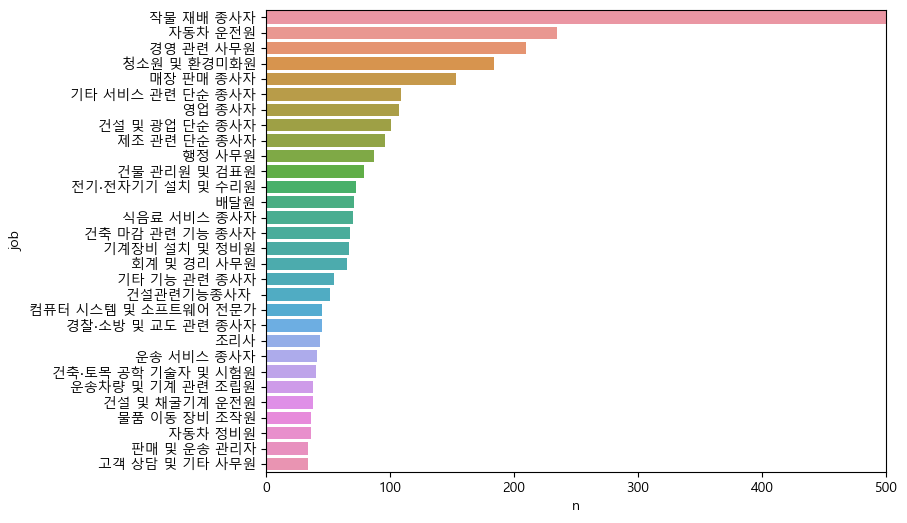

In [23]:
plt.rcParams.update({'figure.figsize': "8, 6"})
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 500));

In [26]:
# 여성 직업 빈도 상위 30개 추출
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림 차순 정렬
# 상위 30개 추출
# index reset
job_female = df.dropna(subset=['job']).query('gender=="female"').groupby(['job']).agg(n=('job', 'count')) \
  .sort_values(['n'], ascending=[False]).head(30).reset_index(drop=False)
job_female

,job,n
0,작물 재배 종사자,597
1,청소원 및 환경미화원,493
2,매장 판매 종사자,223
3,돌봄 및 보건 서비스 종사자,223
4,기타 서비스 관련 단순 종사자,206
5,회계 및 경리 사무원,191
6,식음료 서비스 종사자,140
7,제조 관련 단순 종사자,128
8,조리사,126
9,음식 관련 단순 종사자,108


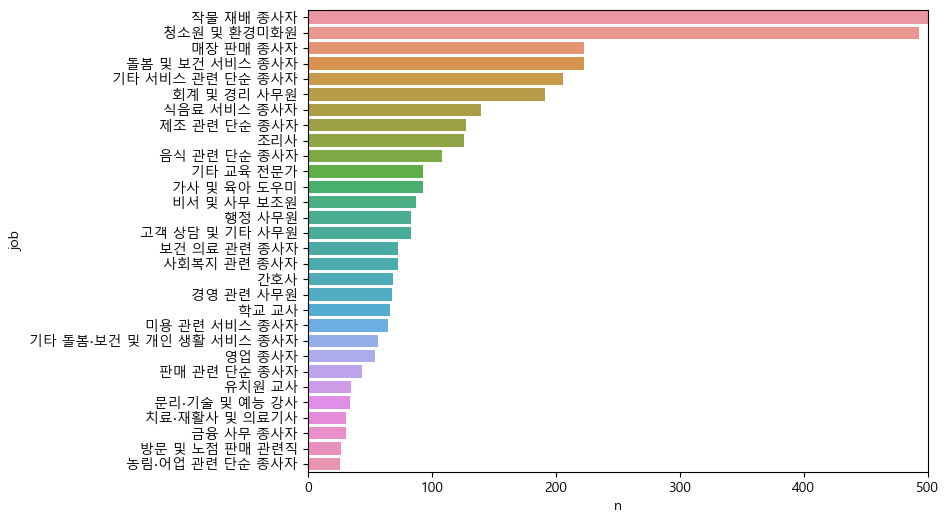

In [27]:
plt.rcParams.update({'figure.figsize': "8, 6"})
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500));